# Models from Scratch: Bootstrapping
## *Implementation*
***

In [24]:
import numpy as np
from statistics import stdev, mean
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
def bootstrap(data, k=1):
    """Returns k bootstrap samples from the data"""
    if k <= 0:
        raise ValueError("k must be greater than 0")

    samples = []
    for _ in range(k):
        samples.append(np.random.choice(data, len(data), replace=True))

    return samples

## *Application*
***

Suppose the population of interest has size 50,000 and follows a Gamma distribution with k=0.5 and θ=1.

In [26]:
np.random.seed(500)
population = np.random.gamma(0.5, scale=1, size=50000)

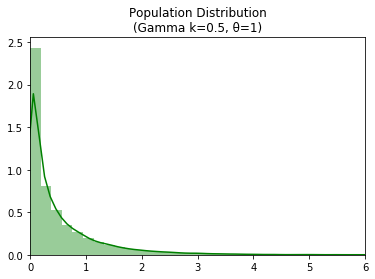

In [27]:
sns.distplot(population, color="green")
plt.title("Population Distribution\n(Gamma k=0.5, θ=1)")
plt.xlim(0, 6)
plt.show()

First, we'll use bootstrapping to construct a confidence interval for the population standard deviation. Since the population is highly non-normal, we cannot rely on chi-square confidence intervals for the standard deviation; we do not know the sampling distribution for the sample standard deviation in this case.

In [28]:
print("The population standard deviation (which we seek to estimate) is {:.2f}".format(stdev(population)))

The population standard deviation (which we seek to estimate) is 0.71


In [29]:
# Our true sample will be of size 200
sample = np.random.choice(population, 200)

In [30]:
# Construct 1000 bootstrap samples
bs_samples = bootstrap(sample, k=1000)

In [31]:
# Bootstrap sampling distribution for the sample standard deviation
sampling_dist = [stdev(sample) for sample in bs_samples]

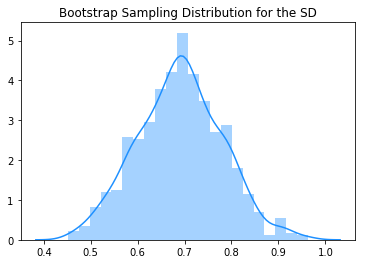

In [32]:
sns.distplot(sampling_dist, color="dodgerblue")
plt.title("Bootstrap Sampling Distribution for the SD")
plt.show()

In [33]:
# Bootstrap-estimates for the estimator and standard error 
estimate = mean(sampling_dist)
SE = stdev(sampling_dist)

In [34]:
# 2.5 / 97.5 percentiles
p1 = np.percentile(sampling_dist, 2.5)
p2 = np.percentile(sampling_dist, 97.5)

In [35]:
# Basic/Pivot 95% Confidence Interval for the standard deviation
CI = (2*estimate - p2, 2*estimate - p1)
print(CI)
# Percentile confidence interval
CI_2 = (p1, p2)
print(CI_2)

(0.51151377836698764, 0.86710122485378327)
(0.51264654262977616, 0.86823398911657179)


We can see that both bootstrap confidence intervals capture the population value of 0.71, as desired.

***

Now we'll use bootstrapping to construct a confidence interval for the difference between the 90th and 80th percentiles. In other words, we're interested in estimating the true distance between the 90th and 80th percentiles. The sampling distribution of this statistic is unknown (especially given that the population follows a Gamma distribution), and thus bootstrapping is an appropriate method.

In [36]:
true = np.percentile(population, 90) - np.percentile(population, 80)
print("The population value for the difference between the 90th and 80th percentile (which we seek to estimate) is {:.2f}".format(true))

The population value for the difference between the 90th and 80th percentile (which we seek to estimate) is 0.53


In [37]:
# Bootstrap sampling distribution for the sample difference in 90th and 80th percentiles
sampling_dist2 = [np.percentile(sample, 90) - np.percentile(sample, 80) for sample in bs_samples]

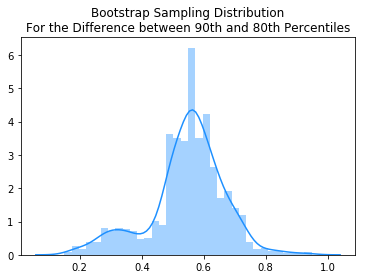

In [38]:
sns.distplot(sampling_dist2, color="dodgerblue")
plt.title("Bootstrap Sampling Distribution\nFor the Difference between 90th and 80th Percentiles")
plt.show()

In [39]:
# Bootstrap-estimates for the estimator and standard error 
estimate = mean(sampling_dist2)
SE = stdev(sampling_dist2)

In [40]:
# 2.5 / 97.5 percentiles
p1 = np.percentile(sampling_dist2, 2.5)
p2 = np.percentile(sampling_dist2, 97.5)

In [41]:
# Basic/Pivot 95% Confidence Interval for the difference between the 90th and 80th percentiles
CI = (2*estimate - p2, 2*estimate - p1)
print(CI)
# Percentile confidence interval 
CI_2 = (p1, p2)
print(CI_2)

(0.34578988941843369, 0.83423904487066303)
(0.25692419234625674, 0.74537334779848607)


We can see that both bootstrap confidence intervals capture the population value of 0.71, as desired.